<a href="https://colab.research.google.com/github/mythogenesys/Andrew-NG-DL-practises/blob/main/STPC_EEG_Research_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
from google.colab import drive

# --- 1. SETUP: Mount your Google Drive ---
# This will prompt you for authorization.
print("Mounting Google Drive...")
drive.mount('/content/drive')
print("Drive mounted successfully.")

# --- 2. SETUP: Define paths ---
# This is the root folder for your project on Google Drive
DRIVE_PROJECT_PATH = "/content/drive/MyDrive/ecg_denoiser_hackathon"
# Define the specific paths for data and where to save models
DRIVE_DATA_PATH = os.path.join(DRIVE_PROJECT_PATH, "data/chb-mit-scalp-eeg-database-1.0.0")
DRIVE_MODEL_SAVE_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_base_drive.pth")



Mounting Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive mounted successfully.


In [ ]:
import os
os.chdir("/content")  # or "/content" if you want the Colab workspace
print(os.getcwd())


/content


In [ ]:
!pwd
!ls

/content
drive  ecg-denoiser-hackathon  sample_data


In [ ]:
!rm -rf ecg-denoiser-hackathon

In [ ]:
!ls

drive  sample_data


In [ ]:
# Create the models directory on your Drive if it doesn't exist
# !mkdir -p {os.path.dirname(DRIVE_MODEL_SAVE_PATH)}

# --- 3. SETUP: Get the latest code from GitHub ---
GIT_REPO_URL = "https://github.com/Mohan-CAS-and-hackathons/stpc-eeg.git"
PROJECT_DIR = "ecg-denoiser-hackathon"

# Clone repo if it doesn't exist, otherwise pull latest changes
if not os.path.exists(PROJECT_DIR):
    print(f"Cloning project from {GIT_REPO_URL}...")
    !git clone -q {GIT_REPO_URL}
else:
    print(f"Project directory exists. Pulling latest changes...")
    %cd {PROJECT_DIR}
    !git pull -q
    %cd ..

# Change directory into the project folder
%cd {PROJECT_DIR}
print(f"Current working directory: {os.getcwd()}")




Cloning project from https://github.com/Mohan-CAS-and-hackathons/ecg-denoiser-hackathon.git...
/content/ecg-denoiser-hackathon
Current working directory: /content/ecg-denoiser-hackathon


In [ ]:

!ls

all_beats.npy	docs		 requirements.txt  triangular_pulse_appendix.md
all_labels.npy	models		 results	   tutorials
app.py		notebooks	 samples
assets		phase1paper.pdf  src
b.py		README.md	 touch


In [ ]:
import os
os.chdir("/content/ecg-denoiser-hackathon")  # or "/content" if you want the Colab workspace
print(os.getcwd())

/content/ecg-denoiser-hackathon


In [ ]:
!pwd

/content/ecg-denoiser-hackathon


In [ ]:
# --- 4. SETUP: Install dependencies ---
print("\n--- Installing required libraries ---")
!pip install -q -r requirements.txt
print("Dependencies installed.")





--- Installing required libraries ---
Dependencies installed.


In [ ]:
# # --- 5. EXECUTION: Run the training script with Drive paths ---
# # This is the key step. We pass the paths from our Drive as arguments
# # to the flexible script we just created.
# print("\n--- Starting the training process using data from Google Drive ---")
# !python src/eeg_train.py \
#     --experiment baseline \
#     --data_dir {DRIVE_DATA_PATH} \
#     --model_save_path {DRIVE_MODEL_SAVE_PATH}

# print("\n--- Training finished! Check your Google Drive for the saved model. ---")


--- Starting the training process using data from Google Drive ---
--- Starting EEG Denoiser Training ---
Device: cpu, Experiment: baseline
Data Directory: /content/drive/MyDrive/ecg_denoiser_hackathon/data/chb-mit-scalp-eeg-database-1.0.0
Model will be saved to: /content/drive/MyDrive/ecg_denoiser_hackathon/models/eeg_denoiser_base_drive.pth
Finding common channels in: /content/drive/MyDrive/ecg_denoiser_hackathon/data/chb-mit-scalp-eeg-database-1.0.0/chb01
Scanning file headers:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/ecg-denoiser-hackathon/src/eeg_train.py:26: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning file headers:  14% 1/7 [00:02<00:15,  2.59s/it]/content/ecg-denoiser-hackathon/ecg-denoiser-hackathon/src/eeg_train.py:26: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying run

In [ ]:
# --- 5. EXECUTION: Run the training experiments ---

# --- Run 1: Baseline Model (L1 only) ---
print("\n--- Starting BASELINE model training ---")
BASELINE_MODEL_SAVE_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_baseline.pth")
!python src/eeg_train.py \
    --experiment baseline \
    --data_dir {DRIVE_DATA_PATH} \
    --model_save_path {BASELINE_MODEL_SAVE_PATH}

# --- Run 2: Spatio-Temporal Model ---
print("\n--- Starting SPATIAL model training ---")
SPATIAL_MODEL_SAVE_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_spatial.pth")
!python src/eeg_train.py \
    --experiment spatial \
    --data_dir {DRIVE_DATA_PATH} \
    --model_save_path {SPATIAL_MODEL_SAVE_PATH} \
    --alpha 1.0 \
    --beta 1.0

print("\n--- All Phase 1 training finished! Check your Google Drive for the saved models. ---")


--- Starting BASELINE model training ---
--- Starting EEG Denoiser Training ---
Scanning for common channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for common channels:  14% 1/7 [00:00<00:02,  2.02it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channe

In [ ]:
# ==============================================================================
#      Phase 1 Validation Cell
# ==============================================================================
# Instructions:
# 1. Make sure you have successfully run the training cell first.
# 2. This cell will pull the latest code (including the new validation script).
# 3. It will generate the comparison video and save it to your Google Drive.
# ==============================================================================

import os

# --- 1. SETUP: Define paths ---
# Ensure these paths match the ones from the training cell
DRIVE_PROJECT_PATH = "/content/drive/MyDrive/ecg_denoiser_hackathon"
DRIVE_DATA_PATH = os.path.join(DRIVE_PROJECT_PATH, "data/chb-mit-scalp-eeg-database-1.0.0")
BASELINE_MODEL_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_baseline.pth")
SPATIAL_MODEL_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_spatial.pth")

# We'll use chb01_03.edf for validation as it contains clear seizure activity
TEST_FILE_PATH = os.path.join(DRIVE_DATA_PATH, "chb01/chb01_03.edf")

# Define where to save the final video
OUTPUT_VIDEO_PATH = os.path.join(DRIVE_PROJECT_PATH, "results/phase1_spatial_comparison.gif")
!mkdir -p {os.path.dirname(OUTPUT_VIDEO_PATH)}

# --- 2. SETUP: Get the latest code from GitHub ---
PROJECT_DIR = "ecg-denoiser-hackathon"
%cd /content/{PROJECT_DIR}
print("Pulling latest code from GitHub...")
!git pull -q

# --- 3. EXECUTION: Run the validation script ---
print("\n--- Starting the validation process ---")
!python src/eeg_validate.py \
    --test_file {TEST_FILE_PATH} \
    --baseline_model_path {BASELINE_MODEL_PATH} \
    --spatial_model_path {SPATIAL_MODEL_PATH} \
    --output_video_path {OUTPUT_VIDEO_PATH}

print("\n--- Validation finished! Check your Google Drive for the output GIF. ---")
# You can also display the GIF directly in Colab (may take a moment to load)
from IPython.display import Image
Image(open(OUTPUT_VIDEO_PATH,'rb').read())

/content/ecg-denoiser-hackathon
Pulling latest code from GitHub...
error: Your local changes to the following files would be overwritten by merge:
	src/eeg_data_utils.py
Please commit your changes or stash them before you merge.
Aborting

--- Starting the validation process ---
--- Starting EEG Denoising Validation ---
Loading and preprocessing test file: /content/drive/MyDrive/ecg_denoiser_hackathon/data/chb-mit-scalp-eeg-database-1.0.0/chb01/chb01_03.edf
/content/ecg-denoiser-hackathon/src/eeg_data_utils.py:16: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal band

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ecg_denoiser_hackathon/results/phase1_spatial_comparison.gif'

In [ ]:
!pip install skimage -q

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import skimage

In [ ]:
# --- 3. EXECUTION: Run the validation script ---
print("\n--- Starting the validation process ---")
!python src/eeg_validate.py \
    --test_file {TEST_FILE_PATH} \
    --baseline_model_path {BASELINE_MODEL_PATH} \
    --spatial_model_path {SPATIAL_MODEL_PATH} \
    --output_video_path {OUTPUT_VIDEO_PATH}

print("\n--- Validation finished! Check your Google Drive for the output GIF. ---")
# You can also display the GIF directly in Colab (may take a moment to load)
from IPython.display import Image
Image(open(OUTPUT_VIDEO_PATH,'rb').read())

In [ ]:
!pwd

/content/ecg-denoiser-hackathon


In [ ]:
# --- Run 3: Frequency-Specific Model ---
print("\n--- Starting FREQUENCY-SPECIFIC model training ---")
FREQUENCY_MODEL_SAVE_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_frequency.pth")
!python src/eeg_train.py \
    --experiment frequency \
    --data_dir {DRIVE_DATA_PATH} \
    --model_save_path {FREQUENCY_MODEL_SAVE_PATH}

print("\n--- All Phase 2 training finished! Check your Google Drive for the new model. ---")


--- Starting FREQUENCY-SPECIFIC model training ---
--- Starting EEG Denoiser Training ---
Scanning for common channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
Scanning for common channels:  14% 1/7 [00:00<00:01,  3.02it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False)
/content/ecg-denoiser-hackathon/src/eeg_train.py:25: RuntimeWarni

In [ ]:
!pwd

/content/ecg-denoiser-hackathon



--- Starting the Phase 2 validation process ---
Attempting to load test file from: /content/drive/MyDrive/ecg_denoiser_hackathon/data/chb-mit-scalp-eeg-database-1.0.0/chb01/chb01_01.edf
/content/ecg-denoiser-hackathon/src/eeg_data_utils.py:16: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True, verbose=False)
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 70 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 70.00 Hz
- Upper

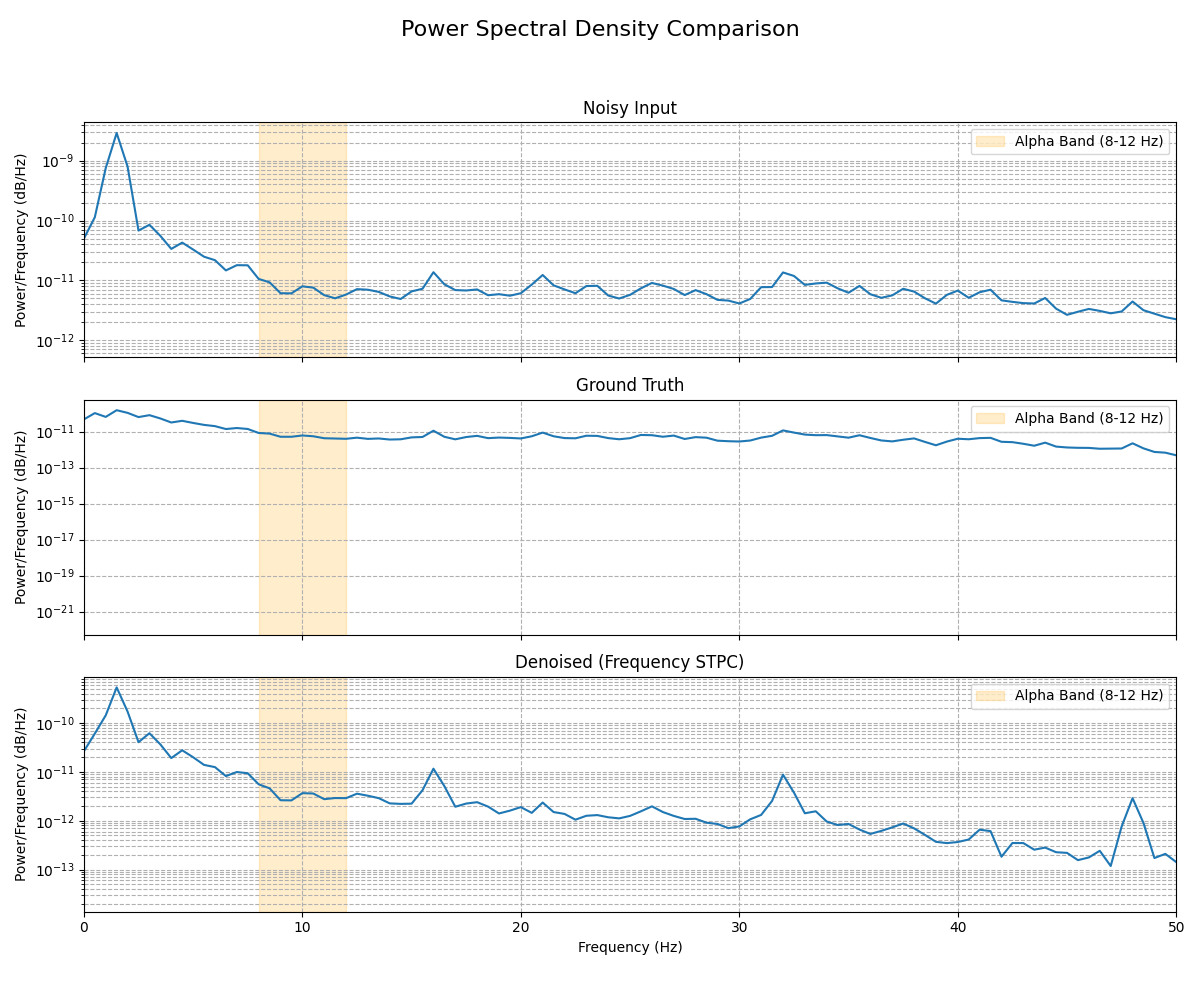

In [ ]:
# ==============================================================================
#      Phase 2 Validation Cell (Frequency) - CORRECTED
# ==============================================================================
import os
from IPython.display import Image

# --- 1. SETUP: Define paths ---
DRIVE_PROJECT_PATH = "/content/drive/MyDrive/ecg_denoiser_hackathon"
# --- NEW: Define the data path on Drive ---
DRIVE_DATA_PATH = os.path.join(DRIVE_PROJECT_PATH, "data/chb-mit-scalp-eeg-database-1.0.0")
# ---
BASELINE_MODEL_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_baseline.pth")
FREQUENCY_MODEL_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_frequency.pth")
OUTPUT_PLOT_PATH = os.path.join(DRIVE_PROJECT_PATH, "results/phase2_frequency_comparison.png")
!mkdir -p {os.path.dirname(OUTPUT_PLOT_PATH)}

# # --- 2. SETUP: Get the latest code from GitHub ---
# PROJECT_DIR = "ecg-denoiser-hackathon"
# %cd /content/{PROJECT_DIR}
# print("Pulling latest code from GitHub...")
# !git pull -q

# --- 3. EXECUTION: Run the validation script with the data_dir argument ---
print("\n--- Starting the Phase 2 validation process ---")
!python src/eeg_validate.py \
    --data_dir {DRIVE_DATA_PATH} \
    --baseline_model_path {BASELINE_MODEL_PATH} \
    --frequency_model_path {FREQUENCY_MODEL_PATH} \
    --output_plot_path {OUTPUT_PLOT_PATH}

print("\n--- Validation finished! Check your Google Drive for the output PNG. ---")
if os.path.exists(OUTPUT_PLOT_PATH):
    display(Image(filename=OUTPUT_PLOT_PATH))

In [ ]:
# --- Run 4: Self-Supervised Model ---
print("\n--- Starting SELF-SUPERVISED model training ---")
SELF_SUPERVISED_MODEL_SAVE_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_self_supervised.pth")
!python src/eeg_train.py \
    --experiment self_supervised \
    --data_dir {DRIVE_DATA_PATH} \
    --model_save_path {SELF_SUPERVISED_MODEL_SAVE_PATH}

print("\n--- All Phase 3 training finished! Check your Google Drive for the new model. ---")


--- Starting SELF-SUPERVISED model training ---
--- Starting EEG Denoiser Training for experiment: self_supervised ---
Scanning for common channels:   0% 0/7 [00:00<?, ?it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:24: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False); current_monopolar_upper = set()
Scanning for common channels:  14% 1/7 [00:00<00:01,  3.01it/s]/content/ecg-denoiser-hackathon/src/eeg_train.py:24: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=False, verbose=False); current_monopolar_upper = set()
/content/ecg-denoiser-hackathon/src/eeg_train.py:24: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, 


--- Starting the Phase 3 validation process ---
2025-09-27 11:47:10.590403: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758973630.611673   56236 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758973630.618217   56236 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758973630.634585   56236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758973630.634620   56236 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1758973630.634627   56236 

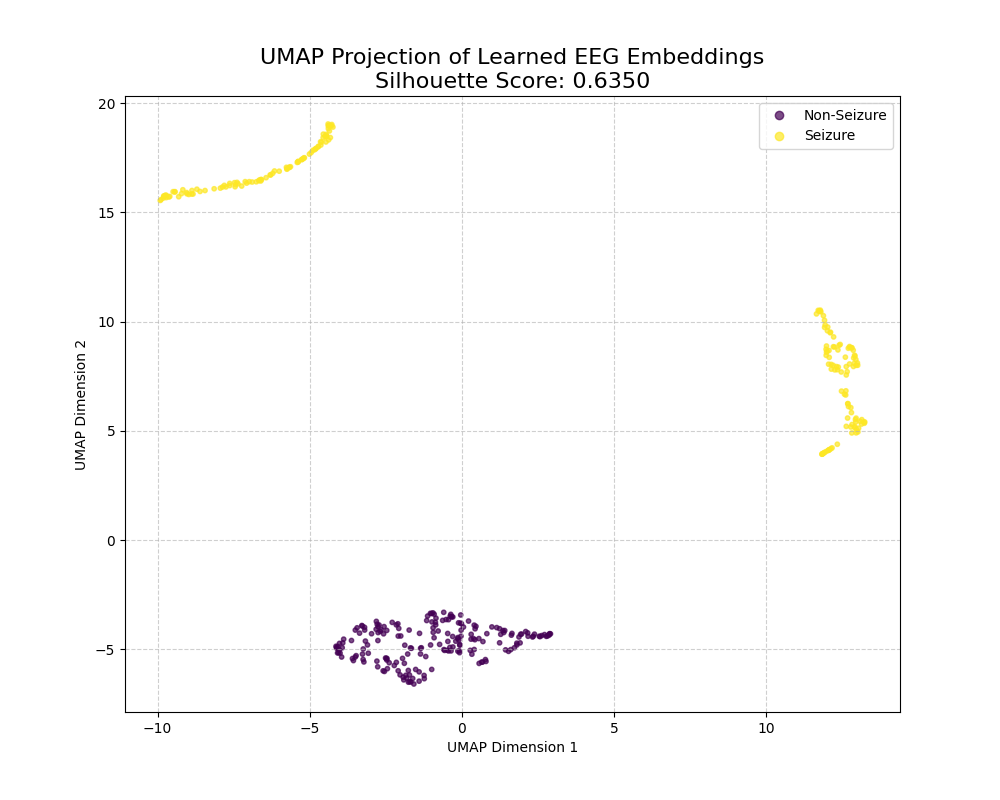

In [ ]:
# ==============================================================================
#      Phase 3 Validation Cell (Self-Supervised) - DEFINITIVE VERSION
# ==============================================================================
import os
from IPython.display import Image

# --- 1. SETUP: Define Python variables for all paths ---
DRIVE_PROJECT_PATH = "/content/drive/MyDrive/ecg_denoiser_hackathon"
DRIVE_DATA_PATH = os.path.join(DRIVE_PROJECT_PATH, "data/chb-mit-scalp-eeg-database-1.0.0")
SELF_SUPERVISED_MODEL_PATH = os.path.join(DRIVE_PROJECT_PATH, "models/eeg_denoiser_self_supervised.pth")
OUTPUT_PLOT_PATH = os.path.join(DRIVE_PROJECT_PATH, "results/phase3_embedding_comparison.png")

# Ensure the output directory exists
os.makedirs(os.path.dirname(OUTPUT_PLOT_PATH), exist_ok=True)



# --- 3. EXECUTION: Run the validation script ---
# The '$' prefix correctly passes the Python variable's value to the shell command.
print("\n--- Starting the Phase 3 validation process ---")
!python src/eeg_validate.py \
    --experiment self_supervised \
    --data_dir "{DRIVE_DATA_PATH}" \
    --self_supervised_model_path "{SELF_SUPERVISED_MODEL_PATH}" \
    --output_path "{OUTPUT_PLOT_PATH}"

print("\n--- Validation finished! Check your Google Drive for the output PNG. ---")
if os.path.exists(OUTPUT_PLOT_PATH):
    display(Image(filename=OUTPUT_PLOT_PATH))
else:
    print(f"ERROR: Output file not found at {OUTPUT_PLOT_PATH}")